<a href="https://colab.research.google.com/github/VamsiKrishna-05/Banky/blob/main/CCPS_Custom_ML_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# A validated custom DAG-SVM with FFO architecture
!pip install imbalanced-learn

# 📂 Imports
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score
from imblearn.over_sampling import SMOTE

# 📥 Load dataset
df = pd.read_csv("Crop Recommendation using Soil Properties and Weather Prediction.csv")

# 🧹 Encode categorical and target columns
df['Soilcolor'] = LabelEncoder().fit_transform(df['Soilcolor'])
df['label'] = LabelEncoder().fit_transform(df['label'])

X = df.drop(columns=['label'])
y = df['label']

# ⚖️ Standardize and balance data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

# 🍇 Optimized Fruit Fly Optimization (FFO)
def fast_ffo(X, y, generations=3, pop_size=5):
    best_score = 0
    best_C, best_gamma = 1, 0.1

    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

    for gen in range(generations):
        print(f"🌀 Generation {gen+1}/{generations}")
        C_vals = np.random.uniform(0.1, 50, pop_size)
        gamma_vals = np.random.uniform(0.001, 2, pop_size)

        for i in range(pop_size):
            C, gamma = C_vals[i], gamma_vals[i]
            model = SVC(C=C, gamma=gamma, kernel='rbf')
            model.fit(X_train, y_train)
            score = model.score(X_val, y_val)
            if score > best_score:
                best_score = score
                best_C, best_gamma = C, gamma
                print(f"  ✅ New Best Score: {best_score:.4f} | C={C:.3f}, gamma={gamma:.3f}")
    return best_C, best_gamma

# 🔍 Find best C and gamma
best_C, best_gamma = fast_ffo(X_resampled, y_resampled)

# 🧠 DAG-based SVM Training
def train_dag_svm(X, y, C, gamma):
    classes = np.unique(y)
    models = {}
    for i in range(len(classes)):
        for j in range(i+1, len(classes)):
            class_i, class_j = classes[i], classes[j]
            mask = (y == class_i) | (y == class_j)
            X_pair, y_pair = X[mask], y[mask]
            y_binary = np.where(y_pair == class_i, 0, 1)
            clf = SVC(C=C, gamma=gamma, kernel='rbf')
            clf.fit(X_pair, y_binary)
            models[(class_i, class_j)] = clf
    return models, classes

# 🔮 DAG Prediction Logic
def predict_dag(models, x, class_list):
    remaining = list(class_list)
    while len(remaining) > 1:
        i, j = remaining[0], remaining[1]
        clf = models.get((i, j)) or models.get((j, i))
        x_input = x.reshape(1, -1)
        pred = clf.predict(x_input)[0]
        if (i, j) in models:
            if pred == 0:
                remaining.pop(1)
            else:
                remaining.pop(0)
        else:
            if pred == 0:
                remaining.pop(0)
            else:
                remaining.pop(1)
    return remaining[0]

# 🧪 Train DAG models
models, class_list = train_dag_svm(X_resampled, y_resampled, best_C, best_gamma)

# ✂️ Split test set
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# 🧠 Predict with DAG SVM
print("\n🔄 Predicting test samples...")
y_pred = [predict_dag(models, x, class_list) for x in X_test]

# 📊 Evaluate
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"\n✅ Final DAG-SVM Accuracy: {acc:.4f}")
print(f"🎯 Final DAG-SVM F1 Score: {f1:.4f}")


🌀 Generation 1/3
  ✅ New Best Score: 0.8025 | C=10.187, gamma=0.289
  ✅ New Best Score: 0.8554 | C=46.883, gamma=1.624
  ✅ New Best Score: 0.8563 | C=46.888, gamma=1.313
🌀 Generation 2/3
🌀 Generation 3/3

🔄 Predicting test samples...

✅ Final DAG-SVM Accuracy: 0.9960
🎯 Final DAG-SVM F1 Score: 0.9960


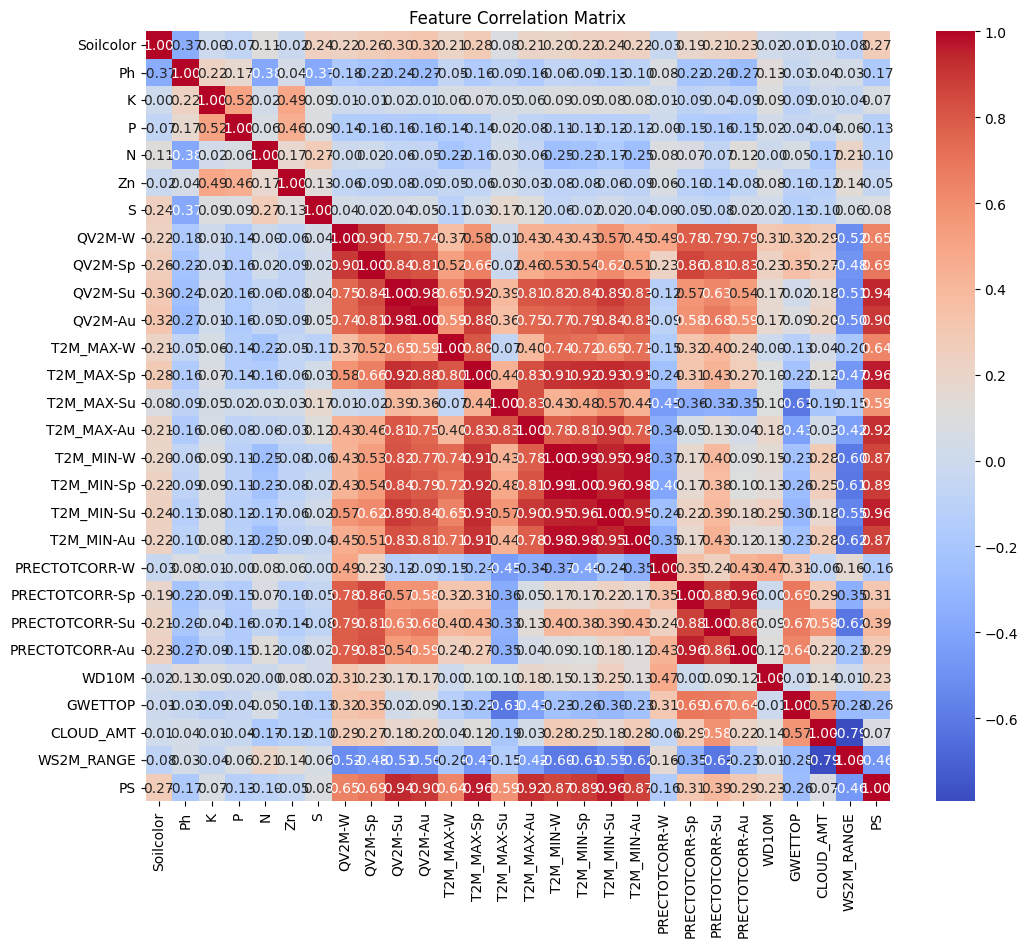

🌀 Generation 1/3
  ✅ New Best Score: 0.8556 | C=35.975, gamma=0.995
🌀 Generation 2/3
🌀 Generation 3/3
  ✅ New Best Score: 0.8565 | C=40.266, gamma=1.293

🔄 Predicting test samples...

✅ Final DAG-SVM Accuracy: 0.9957
🎯 Final DAG-SVM F1 Score: 0.9957


<Figure size 1000x800 with 0 Axes>

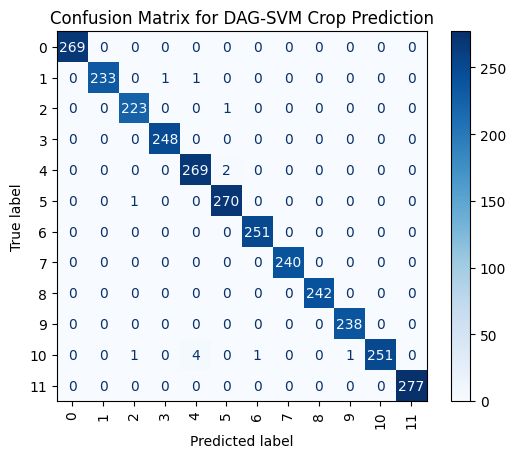

/tmp/ipython-input-2-2419663349.py:123: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab10', n_classes)


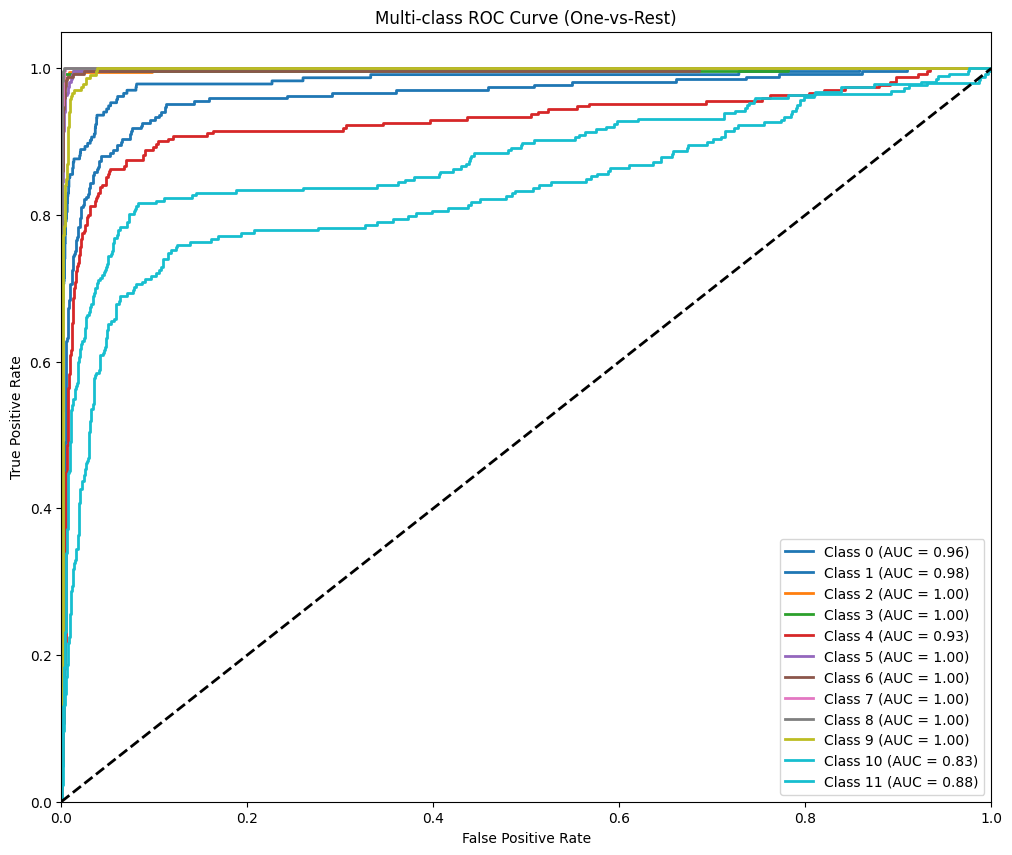

In [ ]:
# 📂 Imports
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier

# 📥 Load dataset
df = pd.read_csv("Crop Recommendation using Soil Properties and Weather Prediction.csv")
df['Soilcolor'] = LabelEncoder().fit_transform(df['Soilcolor'])
df['label'] = LabelEncoder().fit_transform(df['label'])

X = df.drop(columns=['label'])
y = df['label']

# 🔍 Correlation Heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(X.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Matrix")
plt.show()

# ⚖️ Standardize and balance data (like Code-1)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

# 🍇 Fruit Fly Optimization (FFO)
def fast_ffo(X, y, generations=3, pop_size=5):
    best_score = 0
    best_C, best_gamma = 1, 0.1
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

    for gen in range(generations):
        print(f"🌀 Generation {gen+1}/{generations}")
        C_vals = np.random.uniform(0.1, 50, pop_size)
        gamma_vals = np.random.uniform(0.001, 2, pop_size)

        for i in range(pop_size):
            C, gamma = C_vals[i], gamma_vals[i]
            model = SVC(C=C, gamma=gamma, kernel='rbf')
            model.fit(X_train, y_train)
            score = model.score(X_val, y_val)
            if score > best_score:
                best_score = score
                best_C, best_gamma = C, gamma
                print(f"  ✅ New Best Score: {best_score:.4f} | C={C:.3f}, gamma={gamma:.3f}")
    return best_C, best_gamma

best_C, best_gamma = fast_ffo(X_resampled, y_resampled)

# 🧠 DAG-SVM Training
def train_dag_svm(X, y, C, gamma):
    classes = np.unique(y)
    models = {}
    for i in range(len(classes)):
        for j in range(i+1, len(classes)):
            class_i, class_j = classes[i], classes[j]
            mask = (y == class_i) | (y == class_j)
            X_pair, y_pair = X[mask], y[mask]
            y_binary = np.where(y_pair == class_i, 0, 1)
            clf = SVC(C=C, gamma=gamma, kernel='rbf')
            clf.fit(X_pair, y_binary)
            models[(class_i, class_j)] = clf
    return models, classes

# 🔮 DAG Prediction Logic
def predict_dag(models, x, class_list):
    remaining = list(class_list)
    while len(remaining) > 1:
        i, j = remaining[0], remaining[1]
        clf = models.get((i, j)) or models.get((j, i))
        x_input = x.reshape(1, -1)
        pred = clf.predict(x_input)[0]
        if (i, j) in models:
            if pred == 0:
                remaining.pop(1)
            else:
                remaining.pop(0)
        else:
            if pred == 0:
                remaining.pop(0)
            else:
                remaining.pop(1)
    return remaining[0]

# ✂️ Split test set
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# 🧪 Train and Predict
models, class_list = train_dag_svm(X_resampled, y_resampled, best_C, best_gamma)
print("\n🔄 Predicting test samples...")
y_pred = [predict_dag(models, x, class_list) for x in X_test]

# 📊 Evaluate
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
print(f"\n✅ Final DAG-SVM Accuracy: {acc:.4f}")
print(f"🎯 Final DAG-SVM F1 Score: {f1:.4f}")

# 📉 Confusion Matrix
cm = confusion_matrix(y_test, y_pred, labels=class_list)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_list)
plt.figure(figsize=(10, 8))
disp.plot(cmap='Blues', xticks_rotation='vertical')
plt.title("Confusion Matrix for DAG-SVM Crop Prediction")
plt.show()

# 📈 ROC Curve (using One-vs-Rest SVM for probabilities)
y_test_bin = label_binarize(y_test, classes=class_list)
n_classes = y_test_bin.shape[1]
ovr_clf = OneVsRestClassifier(SVC(C=best_C, gamma=best_gamma, kernel='rbf', probability=True))
ovr_clf.fit(X_train, y_train)
y_score = ovr_clf.decision_function(X_test)

plt.figure(figsize=(12, 10))
colors = plt.cm.get_cmap('tab10', n_classes)
for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    plt.plot(fpr, tpr, color=colors(i), lw=2, label=f'Class {class_list[i]} (AUC = {auc(fpr, tpr):.2f})')
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-class ROC Curve (One-vs-Rest)')
plt.legend(loc='lower right')
plt.show()


In [ ]:
# 📦 Install needed packages if running in Colab or Jupyter
# !pip install imbalanced-learn xgboost

import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score
from imblearn.over_sampling import SMOTE

# 📂 Load dataset
df = pd.read_csv("Crop Recommendation using Soil Properties and Weather Prediction.csv")

# 🧹 Encode categorical variables
df['Soilcolor'] = LabelEncoder().fit_transform(df['Soilcolor'])
df['label'] = LabelEncoder().fit_transform(df['label'])

# 🎯 Feature and target split
X = df.drop(columns=['label'])
y = df['label']

# ⚖️ Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ➕ Apply SMOTE for class balancing
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

# ✂️ Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# 🧠 Initialize models
models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42)
}

# 📊 Train and evaluate
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    results[name] = {"Accuracy": round(acc, 4), "F1 Score": round(f1, 4)}

# 📈 Show results
results_df = pd.DataFrame(results).T
print("🔍 Model Comparison with SMOTE + Scaling:\n")
print(results_df)


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [05:42:29] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


🔍 Model Comparison with SMOTE + Scaling:

                     Accuracy  F1 Score
Random Forest          0.8452    0.8398
XGBoost                0.8373    0.8328
Logistic Regression    0.4302    0.3942


In [ ]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, f1_score

# Models to compare
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC

import pandas as pd
import numpy as np
# 1. Load and preprocess data
df = pd.read_csv("Crop Recommendation using Soil Properties and Weather Prediction.csv")
df['Soilcolor'] = LabelEncoder().fit_transform(df['Soilcolor'])
df['label'] = LabelEncoder().fit_transform(df['label'])

X = df.drop(columns=['label'])
y = df['label']

# 2. Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 3. Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 4. Balance training data
smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train_scaled, y_train)

# 5. Define models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, multi_class='multinomial'),
    "KNN": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Extra Trees": ExtraTreesClassifier(),
    "Naive Bayes": GaussianNB(),
    "MLP": MLPClassifier(max_iter=500),
    "SVM (RBF)": SVC(kernel='rbf'),
    # Add your DAG-SVM+FFO here as a separate entry if implemented as a class/function
}

# 6. Train, predict, and evaluate
results = []
for name, model in models.items():
    model.fit(X_train_bal, y_train_bal)
    y_pred = model.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    results.append([name, acc, f1])

# 7. Present results
results_df = pd.DataFrame(results, columns=["Model", "Accuracy", "Weighted F1"])
print(results_df)


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


                 Model  Accuracy  Weighted F1
0  Logistic Regression  0.191214     0.218417
1                  KNN  0.298450     0.327577
2        Decision Tree  0.334625     0.349315
3        Random Forest  0.441860     0.444138
4          Extra Trees  0.447028     0.450598
5          Naive Bayes  0.129199     0.156894
6                  MLP  0.359173     0.382589
7            SVM (RBF)  0.279070     0.320626


In [ ]:
print(df['label'].value_counts())


label
10    1260
4      732
11     715
0      503
1      253
6       94
9       72
2       71
5       64
7       48
8       29
3       26
Name: count, dtype: int64


**Setup and Preprocessing**

In [ ]:

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, f1_score

# Load data
df = pd.read_csv("Crop Recommendation using Soil Properties and Weather Prediction.csv")


# Encode categorical columns
df['Soilcolor'] = LabelEncoder().fit_transform(df['Soilcolor'])
df['label'] = LabelEncoder().fit_transform(df['label'])

X = df.drop(columns=['label'])
y = df['label']

# Split before scaling and balancing!
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# SMOTE balancing
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train_scaled, y_train)


**Model Training & Evaluation**

In [ ]:
results = []

# 1. Logistic Regression (weighted)
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter=1000, class_weight='balanced')
lr.fit(X_train_bal, y_train_bal)
y_pred = lr.predict(X_test_scaled)
results.append(["Logistic Regression (weighted)", accuracy_score(y_test, y_pred), f1_score(y_test, y_pred, average='weighted')])

# 2. Random Forest (weighted)
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(class_weight='balanced', random_state=42)
rf.fit(X_train_bal, y_train_bal)
y_pred = rf.predict(X_test_scaled)
results.append(["Random Forest (weighted)", accuracy_score(y_test, y_pred), f1_score(y_test, y_pred, average='weighted')])

# 3. Decision Tree (weighted)
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(class_weight='balanced', random_state=42)
dt.fit(X_train_bal, y_train_bal)
y_pred = dt.predict(X_test_scaled)
results.append(["Decision Tree (weighted)", accuracy_score(y_test, y_pred), f1_score(y_test, y_pred, average='weighted')])

# 4. SVM (weighted)
from sklearn.svm import SVC
svm = SVC(class_weight='balanced', random_state=42)
svm.fit(X_train_bal, y_train_bal)
y_pred = svm.predict(X_test_scaled)
results.append(["SVM (weighted)", accuracy_score(y_test, y_pred), f1_score(y_test, y_pred, average='weighted')])

# 5. Balanced Random Forest (imblearn)
from imblearn.ensemble import BalancedRandomForestClassifier
brf = BalancedRandomForestClassifier(random_state=42)
brf.fit(X_train, y_train)  # Note: balanced inside, so use original train
y_pred = brf.predict(X_test)
results.append(["Balanced Random Forest", accuracy_score(y_test, y_pred), f1_score(y_test, y_pred, average='weighted')])

# 6. EasyEnsembleClassifier (imblearn)
from imblearn.ensemble import EasyEnsembleClassifier
eec = EasyEnsembleClassifier(random_state=42)
eec.fit(X_train, y_train)
y_pred = eec.predict(X_test)
results.append(["EasyEnsembleClassifier", accuracy_score(y_test, y_pred), f1_score(y_test, y_pred, average='weighted')])

# 7. XGBoost (weighted)
try:
    from xgboost import XGBClassifier
    xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', scale_pos_weight=10, random_state=42)
    xgb.fit(X_train_bal, y_train_bal)
    y_pred = xgb.predict(X_test_scaled)
    results.append(["XGBoost (weighted)", accuracy_score(y_test, y_pred), f1_score(y_test, y_pred, average='weighted')])
except ImportError:
    print("XGBoost not installed, skipping.")

# 8. LightGBM (weighted)
try:
    from lightgbm import LGBMClassifier
    lgb = LGBMClassifier(class_weight='balanced', random_state=42)
    lgb.fit(X_train_bal, y_train_bal)
    y_pred = lgb.predict(X_test_scaled)
    results.append(["LightGBM (weighted)", accuracy_score(y_test, y_pred), f1_score(y_test, y_pred, average='weighted')])
except ImportError:
    print("LightGBM not installed, skipping.")

# 9. MLP (weighted)
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(max_iter=500, random_state=42)
mlp.fit(X_train_bal, y_train_bal)
y_pred = mlp.predict(X_test_scaled)
results.append(["MLPClassifier", accuracy_score(y_test, y_pred), f1_score(y_test, y_pred, average='weighted')])


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [03:18:06] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "scale_pos_weight", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001470 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 7137
[LightGBM] [Info] Number of data points in the train set: 12096, number of used features: 28
[LightGBM] [Info] Start training from score -2.484907
[LightGBM] [Info] Start training from score -2.484907
[LightGBM] [Info] Start training from score -2.484907
[LightGBM] [Info] Start training from score -2.484907
[LightGBM] [Info] Start training from score -2.484907
[LightGBM] [Info] Start training from score -2.484907
[LightGBM] [Info] Start training from score -2.484907
[LightGBM] [Info] Start training from score -2.484907
[LightGBM] [Info] Start training from score -2.484907
[LightGBM] [Info] Start training from score -2.484907
[LightGBM] [Info] Start training from score -2.484907
[LightGBM] [Info] Start training from score -2.484907

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


**Results Table**

In [ ]:
results_df = pd.DataFrame(results, columns=["Model", "Accuracy", "Weighted F1"])
print(results_df)


                            Model  Accuracy  Weighted F1
0  Logistic Regression (weighted)  0.191214     0.218417
1        Random Forest (weighted)  0.439276     0.440377
2        Decision Tree (weighted)  0.320413     0.336293
3                  SVM (weighted)  0.279070     0.320626
4          Balanced Random Forest  0.242894     0.275227
5          EasyEnsembleClassifier  0.189922     0.221247
6              XGBoost (weighted)  0.447028     0.446179
7             LightGBM (weighted)  0.461240     0.455096
8                   MLPClassifier  0.368217     0.388614


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))  # For the last model run


              precision    recall  f1-score   support

           0       0.30      0.37      0.33       101
           1       0.17      0.25      0.20        51
           2       0.10      0.21      0.14        14
           3       0.00      0.00      0.00         5
           4       0.52      0.42      0.47       146
           5       0.00      0.00      0.00        13
           6       0.20      0.53      0.29        19
           7       0.06      0.10      0.07        10
           8       0.22      0.33      0.27         6
           9       0.05      0.07      0.06        14
          10       0.57      0.43      0.49       252
          11       0.44      0.33      0.38       143

    accuracy                           0.37       774
   macro avg       0.22      0.25      0.22       774
weighted avg       0.43      0.37      0.39       774



In [ ]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from imblearn.over_sampling import SMOTE
import pandas as pd

# Load and preprocess data
df = pd.read_csv("Crop Recommendation using Soil Properties and Weather Prediction.csv")
df['Soilcolor'] = LabelEncoder().fit_transform(df['Soilcolor'])
df['label'] = LabelEncoder().fit_transform(df['label'])
X = df.drop(columns=['label'])
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

# Define base and meta learners
base_learners = [
    ('rf', RandomForestClassifier(class_weight='balanced', random_state=42)),
    ('svc', SVC(probability=True, class_weight='balanced', random_state=42))
]
meta_learner = LogisticRegression(max_iter=1000, class_weight='balanced')

stack = StackingClassifier(estimators=base_learners, final_estimator=meta_learner, n_jobs=-1)
stack.fit(X_train, y_train)
y_pred = stack.predict(X_test)

from sklearn.metrics import accuracy_score, f1_score
print("Stacking Accuracy:", accuracy_score(y_test, y_pred))
print("Stacking Weighted F1:", f1_score(y_test, y_pred, average='weighted'))


Stacking Accuracy: 0.44573643410852715
Stacking Weighted F1: 0.43506887241362024


In [ ]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier

# Define majority and minority classes
majority_classes = [10, 4, 11, 0]  # Example: adjust as per your data
minority_classes = [c for c in np.unique(y) if c not in majority_classes]

# First stage: majority vs. minority
y_train_stage1 = np.where(np.isin(y_train, majority_classes), 0, 1)
y_test_stage1 = np.where(np.isin(y_test, majority_classes), 0, 1)
stage1_clf = DecisionTreeClassifier(class_weight='balanced', random_state=42)
stage1_clf.fit(X_train, y_train_stage1)
stage1_pred = stage1_clf.predict(X_test)

# Second stage: specialized classifiers
# For majority
maj_idx = np.where(stage1_pred == 0)[0]
maj_clf = RandomForestClassifier(class_weight='balanced', random_state=42)
maj_clf.fit(X_train[np.isin(y_train, majority_classes)], y_train[np.isin(y_train, majority_classes)])
maj_pred = maj_clf.predict(X_test[maj_idx])

# For minority
min_idx = np.where(stage1_pred == 1)[0]
min_clf = RandomForestClassifier(class_weight='balanced', random_state=42)
min_clf.fit(X_train[np.isin(y_train, minority_classes)], y_train[np.isin(y_train, minority_classes)])
min_pred = min_clf.predict(X_test[min_idx])

# Combine predictions
final_pred = np.zeros_like(y_test)
final_pred[maj_idx] = maj_pred
final_pred[min_idx] = min_pred

print("Hierarchical Accuracy:", accuracy_score(y_test, final_pred))
print("Hierarchical Weighted F1:", f1_score(y_test, final_pred, average='weighted'))


Hierarchical Accuracy: 0.4108527131782946
Hierarchical Weighted F1: 0.42972109492231314


In [ ]:
pip install pandas scikit-learn imbalanced-learn lightgbm


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, f1_score, classification_report

# === 1. Data Loading & Preprocessing ===
df = pd.read_csv("Crop Recommendation using Soil Properties and Weather Prediction.csv")
# Encode categorical columns
df['Soilcolor'] = LabelEncoder().fit_transform(df['Soilcolor'])
df['label'] = LabelEncoder().fit_transform(df['label'])
X = df.drop(columns=['label'])
y = df['label']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.2, random_state=42
)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# SMOTE balancing
smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train_scaled, y_train)

# === 2. Stacking Classifier ===
from sklearn.ensemble import StackingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

base_learners = [
    ('rf', RandomForestClassifier(class_weight='balanced', random_state=42)),
    ('svc', SVC(probability=True, class_weight='balanced', random_state=42))
]
meta_learner = LogisticRegression(max_iter=1000, class_weight='balanced')

stack = StackingClassifier(estimators=base_learners, final_estimator=meta_learner, n_jobs=-1)
stack.fit(X_train_bal, y_train_bal)
y_pred_stack = stack.predict(X_test_scaled)
print("\n--- Stacking Classifier ---")
print("Accuracy:", accuracy_score(y_test, y_pred_stack))
print("Weighted F1:", f1_score(y_test, y_pred_stack, average='weighted'))

# === 3. Hierarchical Model (Meta-Learning) ===
# Define majority classes (top 4 by count)
class_counts = pd.Series(y).value_counts()
majority_classes = class_counts.iloc[:4].index.tolist()
minority_classes = class_counts.iloc[4:].index.tolist()

# First stage: majority vs. minority
y_train_stage1 = np.where(np.isin(y_train_bal, majority_classes), 0, 1)
y_test_stage1 = np.where(np.isin(y_test, majority_classes), 0, 1)
from sklearn.tree import DecisionTreeClassifier

stage1_clf = DecisionTreeClassifier(class_weight='balanced', random_state=42)
stage1_clf.fit(X_train_bal, y_train_stage1)
stage1_pred = stage1_clf.predict(X_test_scaled)

# Second stage: specialized classifiers
maj_idx = np.where(stage1_pred == 0)[0]
min_idx = np.where(stage1_pred == 1)[0]

# Majority classifier
maj_mask = np.isin(y_train_bal, majority_classes)
maj_clf = RandomForestClassifier(class_weight='balanced', random_state=42)
maj_clf.fit(X_train_bal[maj_mask], y_train_bal[maj_mask])
maj_pred = maj_clf.predict(X_test_scaled[maj_idx])

# Minority classifier
min_mask = np.isin(y_train_bal, minority_classes)
min_clf = RandomForestClassifier(class_weight='balanced', random_state=42)
min_clf.fit(X_train_bal[min_mask], y_train_bal[min_mask])
min_pred = min_clf.predict(X_test_scaled[min_idx])

# Combine predictions
final_pred = np.zeros_like(y_test)
final_pred[maj_idx] = maj_pred
final_pred[min_idx] = min_pred

print("\n--- Hierarchical Model ---")
print("Accuracy:", accuracy_score(y_test, final_pred))
print("Weighted F1:", f1_score(y_test, final_pred, average='weighted'))



--- Stacking Classifier ---
Accuracy: 0.44573643410852715
Weighted F1: 0.43506887241362024

--- Hierarchical Model ---
Accuracy: 0.4108527131782946
Weighted F1: 0.42972109492231314


TypeError: LGBMClassifier.fit() got an unexpected keyword argument 'early_stopping_rounds'

In [ ]:
from lightgbm import LGBMClassifier, early_stopping
from sklearn.metrics import accuracy_score, f1_score

lgbm = LGBMClassifier(
    objective='multiclass',
    num_class=len(np.unique(y)),
    learning_rate=0.05,
    num_leaves=31,
    class_weight='balanced',
    random_state=42,
    verbosity=1
)

lgbm.fit(
    X_train_bal, y_train_bal,
    eval_set=[(X_test_scaled, y_test)],
    callbacks=[early_stopping(stopping_rounds=10)]
)

y_pred_lgbm = lgbm.predict(X_test_scaled)
print("\n--- LightGBM (class_weight='balanced') ---")
print("Accuracy:", accuracy_score(y_test, y_pred_lgbm))
print("Weighted F1:", f1_score(y_test, y_pred_lgbm, average='weighted'))


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.006383 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7137
[LightGBM] [Info] Number of data points in the train set: 12096, number of used features: 28
[LightGBM] [Info] Start training from score -2.484907
[LightGBM] [Info] Start training from score -2.484907
[LightGBM] [Info] Start training from score -2.484907
[LightGBM] [Info] Start training from score -2.484907
[LightGBM] [Info] Start training from score -2.484907
[LightGBM] [Info] Start training from score -2.484907
[LightGBM] [Info] Start training from score -2.484907
[LightGBM] [Info] Start training from score -2.484907
[LightGBM] [Info] Start training from score -2.484907
[LightGBM] [Info] Start training from score -2.484907
[LightGBM] [Info] Start training from score -2.484907
[LightGBM] [Info] Start training from score -2.484907
Training until validation scores don't improve for 10 rounds
Ea

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, f1_score

# Models to import
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from imblearn.ensemble import BalancedRandomForestClassifier, EasyEnsembleClassifier
from lightgbm import LGBMClassifier, early_stopping

# --- Load and preprocess data ---
df = pd.read_csv("Crop Recommendation using Soil Properties and Weather Prediction.csv")

# Encode categorical columns
df['Soilcolor'] = LabelEncoder().fit_transform(df['Soilcolor'])
df['label'] = LabelEncoder().fit_transform(df['label'])

X = df.drop(columns=['label'])
y = df['label']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.2, random_state=42
)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# SMOTE balancing on training data
smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train_scaled, y_train)

# --- Define models ---
models = {
    "Logistic Regression (weighted)": LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42),
    "Random Forest (weighted)": RandomForestClassifier(class_weight='balanced', random_state=42),
    "Decision Tree (weighted)": DecisionTreeClassifier(class_weight='balanced', random_state=42),
    "SVM (weighted)": SVC(class_weight='balanced', random_state=42),
    "MLPClassifier": MLPClassifier(max_iter=500, random_state=42),
    "Balanced Random Forest": BalancedRandomForestClassifier(random_state=42),
    "EasyEnsembleClassifier": EasyEnsembleClassifier(random_state=42),
    "LightGBM (class_weight='balanced')": LGBMClassifier(
        objective='multiclass',
        num_class=len(np.unique(y)),
        learning_rate=0.05,
        num_leaves=31,
        class_weight='balanced',
        random_state=42,
        verbosity=-1
    )
}

# --- Train, predict, and collect results ---
results = []

for name, model in models.items():
    print(f"Training {name}...")
    # Balanced ensemble models handle imbalance internally, so train on original data
    if name in ["Balanced Random Forest", "EasyEnsembleClassifier"]:
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
    elif name == "LightGBM (class_weight='balanced')":
        model.fit(
            X_train_bal, y_train_bal,
            eval_set=[(X_test_scaled, y_test)],
            callbacks=[early_stopping(stopping_rounds=10)]
        )
        y_pred = model.predict(X_test_scaled)
    else:
        model.fit(X_train_bal, y_train_bal)
        y_pred = model.predict(X_test_scaled)

    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    results.append([name, acc, f1])

# --- Create results DataFrame ---
results_df = pd.DataFrame(results, columns=["Model", "Accuracy", "Weighted F1"])

# Sort by Accuracy descending
results_df = results_df.sort_values(by="Accuracy", ascending=False).reset_index(drop=True)

print("\n=== Model Performance Summary ===")
print(results_df)


Training Logistic Regression (weighted)...
Training Random Forest (weighted)...
Training Decision Tree (weighted)...
Training SVM (weighted)...
Training MLPClassifier...


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Training Balanced Random Forest...
Training EasyEnsembleClassifier...
Training LightGBM (class_weight='balanced')...
Training until validation scores don't improve for 10 rounds


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Early stopping, best iteration is:
[77]	valid_0's multi_logloss: 1.61365

=== Model Performance Summary ===
                                Model  Accuracy  Weighted F1
0  LightGBM (class_weight='balanced')  0.448320     0.452832
1            Random Forest (weighted)  0.439276     0.440377
2                       MLPClassifier  0.368217     0.388614
3            Decision Tree (weighted)  0.320413     0.336293
4                      SVM (weighted)  0.279070     0.320626
5              Balanced Random Forest  0.236434     0.269261
6      Logistic Regression (weighted)  0.191214     0.218417
7              EasyEnsembleClassifier  0.189922     0.221247


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [ ]:
results_df.to_csv("model_performance_summary.csv", index=False)
print("Results saved to model_performance_summary.csv")


Results saved to model_performance_summary.csv


In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader, TensorDataset
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
import numpy as np
import pandas as pd

# === Load and preprocess data ===
df = pd.read_csv("Crop Recommendation using Soil Properties and Weather Prediction.csv")
df['Soilcolor'] = LabelEncoder().fit_transform(df['Soilcolor'])
df['label'] = LabelEncoder().fit_transform(df['label'])

X = df.drop(columns=['label']).values
y = df['label'].values

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, stratify=y, test_size=0.2, random_state=42
)

# Use SMOTE to balance training data
smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train, y_train)

# Convert to PyTorch tensors
X_train_tensor = torch.tensor(X_train_bal, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train_bal, dtype=torch.long)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)

train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64)

# === Define Focal Loss ===
class FocalLoss(nn.Module):
    def __init__(self, alpha=None, gamma=2, reduction='mean', num_classes=None):
        super(FocalLoss, self).__init__()
        self.alpha = alpha
        self.gamma = gamma
        self.reduction = reduction
        self.num_classes = num_classes

        if self.alpha is not None:
            if isinstance(self.alpha, (list, np.ndarray)):
                self.alpha = torch.tensor(self.alpha, dtype=torch.float32)
            else:
                self.alpha = torch.tensor([self.alpha]*num_classes, dtype=torch.float32)
        else:
            self.alpha = torch.ones(num_classes, dtype=torch.float32)

    def forward(self, inputs, targets):
        # inputs: (batch_size, num_classes) raw logits
        # targets: (batch_size) class indices

        ce_loss = F.cross_entropy(inputs, targets, reduction='none')
        pt = torch.exp(-ce_loss)  # pt = prob of true class

        if self.alpha.device != inputs.device:
            self.alpha = self.alpha.to(inputs.device)

        at = self.alpha.gather(0, targets)
        focal_loss = at * ((1 - pt) ** self.gamma) * ce_loss

        if self.reduction == 'mean':
            return focal_loss.mean()
        elif self.reduction == 'sum':
            return focal_loss.sum()
        else:
            return focal_loss

# === Define simple feedforward model ===
class CropClassifier(nn.Module):
    def __init__(self, input_dim, num_classes):
        super(CropClassifier, self).__init__()
        self.fc1 = nn.Linear(input_dim, 128)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, num_classes)

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        return self.fc3(x)

# === Training setup ===
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
num_classes = len(np.unique(y))
model = CropClassifier(X_train.shape[1], num_classes).to(device)
criterion = FocalLoss(alpha=None, gamma=2, reduction='mean', num_classes=num_classes)
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
epochs = 30

# === Training loop ===
for epoch in range(epochs):
    model.train()
    total_loss = 0
    for batch_x, batch_y in train_loader:
        batch_x, batch_y = batch_x.to(device), batch_y.to(device)
        optimizer.zero_grad()
        outputs = model(batch_x)
        loss = criterion(outputs, batch_y)
        loss.backward()
        optimizer.step()
        total_loss += loss.item() * batch_x.size(0)
    avg_loss = total_loss / len(train_loader.dataset)
    print(f"Epoch {epoch+1}/{epochs}, Loss: {avg_loss:.4f}")

# === Evaluation ===
model.eval()
all_preds = []
all_labels = []
with torch.no_grad():
    for batch_x, batch_y in test_loader:
        batch_x = batch_x.to(device)
        outputs = model(batch_x)
        preds = torch.argmax(outputs, dim=1).cpu().numpy()
        all_preds.extend(preds)
        all_labels.extend(batch_y.numpy())

from sklearn.metrics import classification_report, accuracy_score, f1_score
print(f"Test Accuracy: {accuracy_score(all_labels, all_preds):.4f}")
print(f"Test Weighted F1: {f1_score(all_labels, all_preds, average='weighted'):.4f}")
print("Classification Report:\n", classification_report(all_labels, all_preds))


Epoch 1/30, Loss: 1.4252
Epoch 2/30, Loss: 1.0890
Epoch 3/30, Loss: 0.9746
Epoch 4/30, Loss: 0.8930
Epoch 5/30, Loss: 0.8252
Epoch 6/30, Loss: 0.7717
Epoch 7/30, Loss: 0.7291
Epoch 8/30, Loss: 0.6926
Epoch 9/30, Loss: 0.6582
Epoch 10/30, Loss: 0.6317
Epoch 11/30, Loss: 0.6029
Epoch 12/30, Loss: 0.5834
Epoch 13/30, Loss: 0.5624
Epoch 14/30, Loss: 0.5399
Epoch 15/30, Loss: 0.5267
Epoch 16/30, Loss: 0.5099
Epoch 17/30, Loss: 0.4895
Epoch 18/30, Loss: 0.4785
Epoch 19/30, Loss: 0.4666
Epoch 20/30, Loss: 0.4537
Epoch 21/30, Loss: 0.4407
Epoch 22/30, Loss: 0.4349
Epoch 23/30, Loss: 0.4216
Epoch 24/30, Loss: 0.4132
Epoch 25/30, Loss: 0.4028
Epoch 26/30, Loss: 0.3956
Epoch 27/30, Loss: 0.3851
Epoch 28/30, Loss: 0.3757
Epoch 29/30, Loss: 0.3710
Epoch 30/30, Loss: 0.3642
Test Accuracy: 0.3837
Test Weighted F1: 0.3986
Classification Report:
               precision    recall  f1-score   support

           0       0.29      0.46      0.35       101
           1       0.21      0.25      0.23      

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report

# === Load and preprocess data ===
df = pd.read_csv("Crop Recommendation using Soil Properties and Weather Prediction.csv")
df['Soilcolor'] = LabelEncoder().fit_transform(df['Soilcolor'])
df['label'] = LabelEncoder().fit_transform(df['label'])

X = df.drop(columns=['label']).values
y = df['label'].values

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, stratify=y, test_size=0.2, random_state=42
)

# Use SMOTE on training data
smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train, y_train)

# Identify majority classes (top 4 classes by count)
class_counts = pd.Series(y_train_bal).value_counts()
majority_classes = class_counts.index[:4].tolist()
minority_classes = [c for c in np.unique(y_train_bal) if c not in majority_classes]

# Stage 1: Binary classifier majority vs minority
y_train_stage1 = np.where(np.isin(y_train_bal, majority_classes), 0, 1)
y_test_stage1 = np.where(np.isin(y_test, majority_classes), 0, 1)

stage1_clf = DecisionTreeClassifier(class_weight='balanced', random_state=42)
stage1_clf.fit(X_train_bal, y_train_stage1)

stage1_pred = stage1_clf.predict(X_test)

# Stage 2: Specialized classifiers
maj_mask = np.isin(y_train_bal, majority_classes)
min_mask = np.isin(y_train_bal, minority_classes)

maj_clf = RandomForestClassifier(class_weight='balanced', random_state=42)
maj_clf.fit(X_train_bal[maj_mask], y_train_bal[maj_mask])

min_clf = RandomForestClassifier(class_weight='balanced', random_state=42)
min_clf.fit(X_train_bal[min_mask], y_train_bal[min_mask])

# Predict with specialized classifiers
final_pred = np.empty_like(stage1_pred)
maj_idx = np.where(stage1_pred == 0)[0]
min_idx = np.where(stage1_pred == 1)[0]

final_pred[maj_idx] = maj_clf.predict(X_test[maj_idx])
final_pred[min_idx] = min_clf.predict(X_test[min_idx])

# Evaluation
print(f"Hierarchical Model Accuracy: {accuracy_score(y_test, final_pred):.4f}")
print(f"Hierarchical Model Weighted F1: {f1_score(y_test, final_pred, average='weighted'):.4f}")
print("Classification Report:\n", classification_report(y_test, final_pred))


Hierarchical Model Accuracy: 0.4186
Hierarchical Model Weighted F1: 0.4381
Classification Report:
               precision    recall  f1-score   support

           0       0.43      0.40      0.41       101
           1       0.12      0.22      0.16        51
           2       0.12      0.21      0.16        14
           3       0.00      0.00      0.00         5
           4       0.52      0.51      0.52       146
           5       0.00      0.00      0.00        13
           6       0.19      0.32      0.24        19
           7       0.14      0.20      0.17        10
           8       0.10      0.33      0.15         6
           9       0.17      0.29      0.22        14
          10       0.61      0.52      0.56       252
          11       0.52      0.35      0.42       143

    accuracy                           0.42       774
   macro avg       0.25      0.28      0.25       774
weighted avg       0.47      0.42      0.44       774



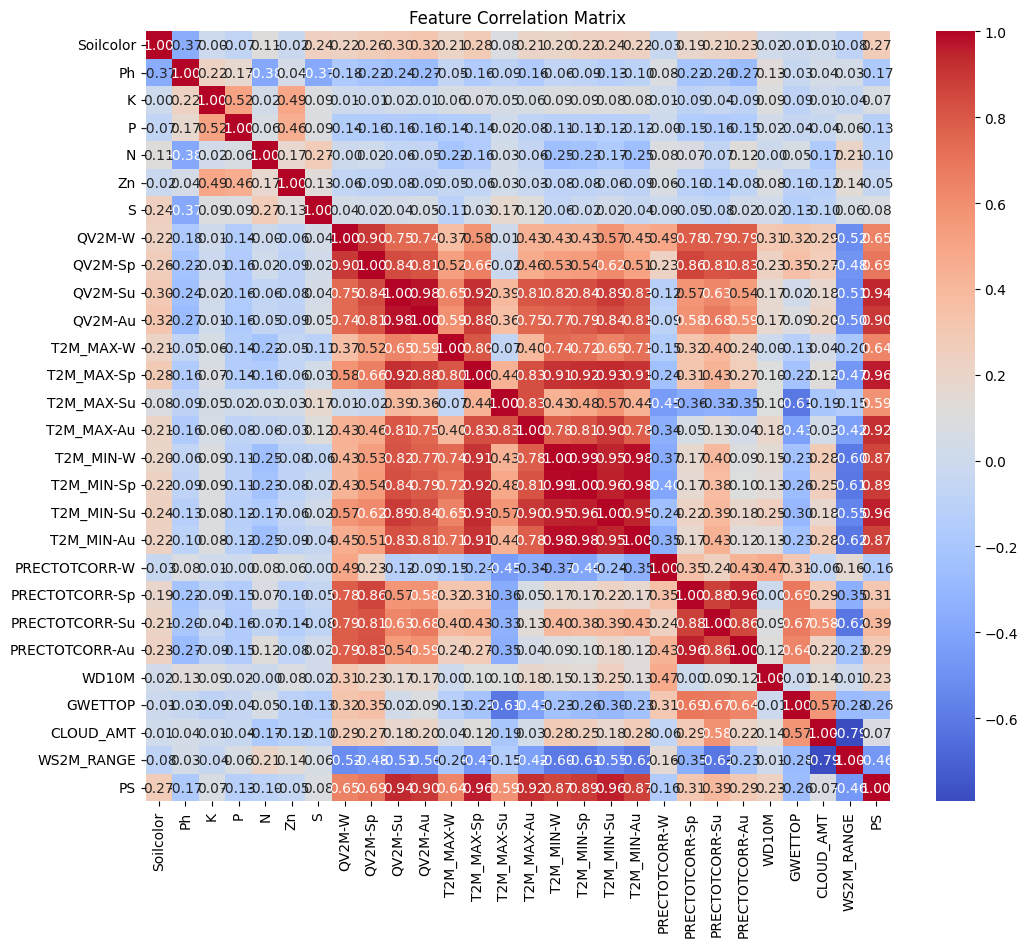

🌀 Generation 1/3
  ✅ New Best Score: 0.8223 | C=47.934, gamma=0.225
  ✅ New Best Score: 0.8547 | C=29.190, gamma=1.431
🌀 Generation 2/3
  ✅ New Best Score: 0.8552 | C=26.127, gamma=1.137
  ✅ New Best Score: 0.8598 | C=48.723, gamma=1.202
🌀 Generation 3/3

🔄 Predicting test samples...

✅ Final DAG-SVM Accuracy: 0.9957
🎯 Final DAG-SVM F1 Score: 0.9957


<Figure size 1000x800 with 0 Axes>

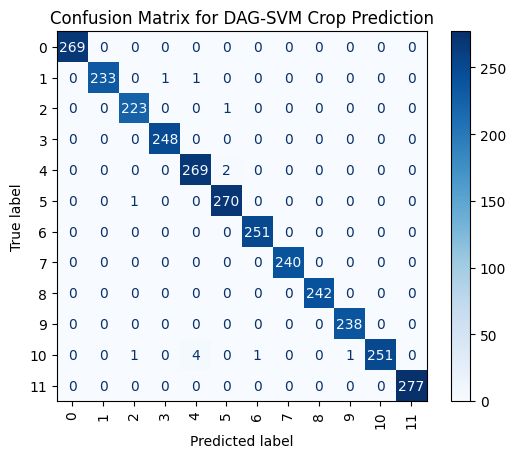

/tmp/ipython-input-4065476633.py:127: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab10', n_classes)


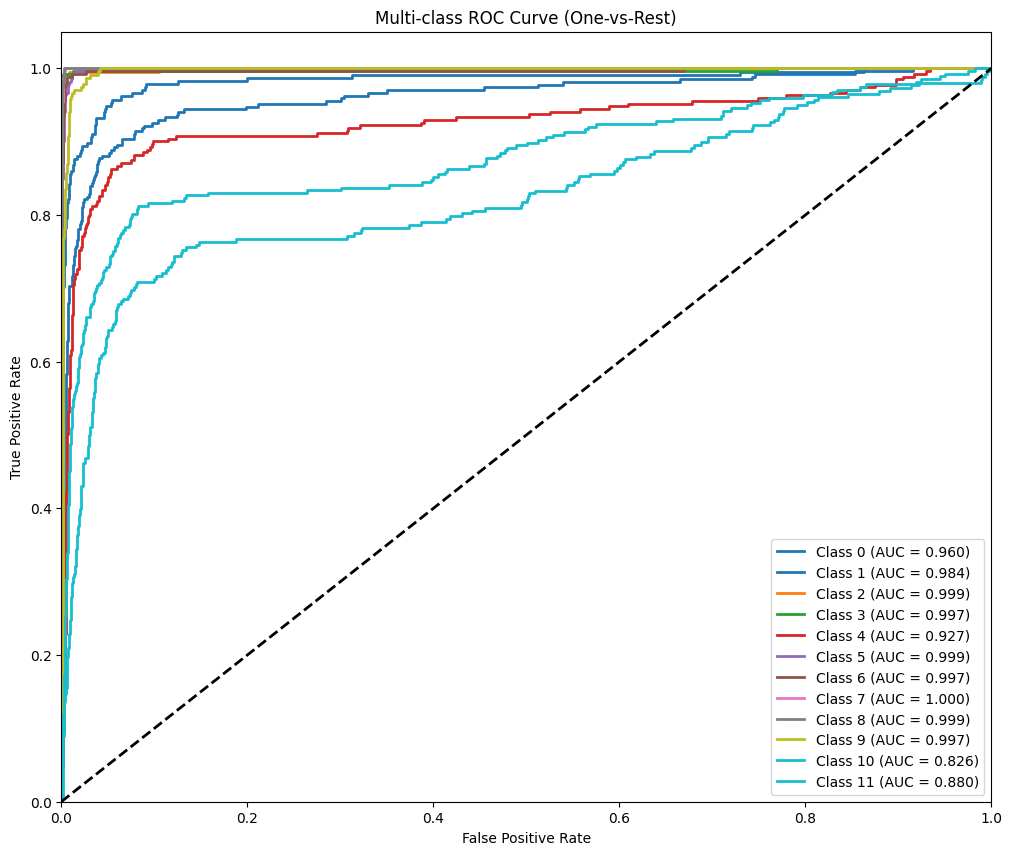

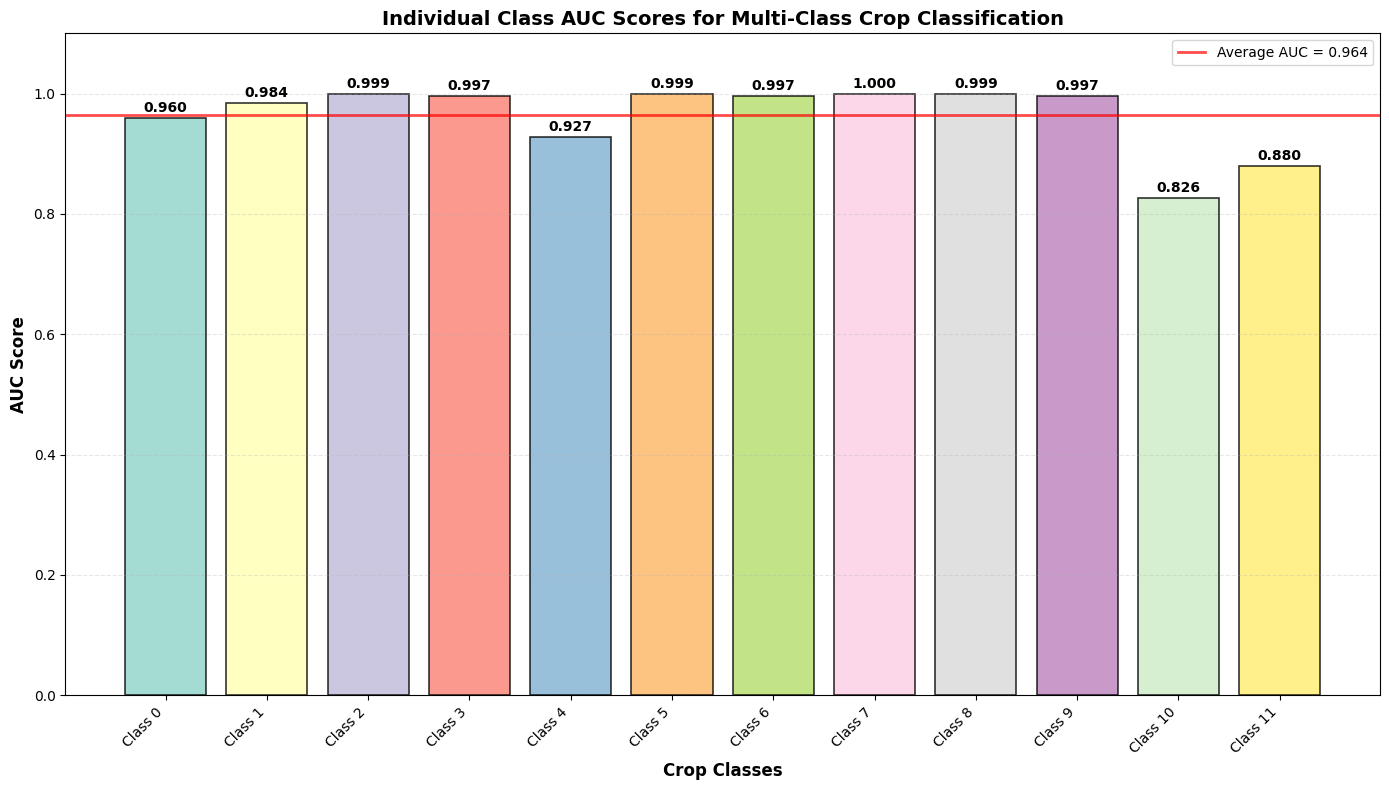


📊 AUC Statistics:
   Average AUC: 0.9636
   Min AUC: 0.8258 (Class 10)
   Max AUC: 0.9997 (Class 7)
   AUC Standard Deviation: 0.0548

📋 AUC Summary Table:
   Class AUC Score Performance
 Class 0    0.9599   Excellent
 Class 1    0.9839   Excellent
 Class 2    0.9986   Excellent
 Class 3    0.9965   Excellent
 Class 4    0.9271        Good
 Class 5    0.9988   Excellent
 Class 6    0.9966   Excellent
 Class 7    0.9997   Excellent
 Class 8    0.9993   Excellent
 Class 9    0.9966   Excellent
Class 10    0.8258        Good
Class 11    0.8803        Good


In [1]:
# 📂 Imports
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier

# 📥 Load dataset
df = pd.read_csv("Crop Recommendation using Soil Properties and Weather Prediction.csv")
df['Soilcolor'] = LabelEncoder().fit_transform(df['Soilcolor'])
df['label'] = LabelEncoder().fit_transform(df['label'])

X = df.drop(columns=['label'])
y = df['label']

# 🔍 Correlation Heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(X.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Matrix")
plt.show()

# ⚖️ Standardize and balance data (like Code-1)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

# 🍇 Fruit Fly Optimization (FFO)
def fast_ffo(X, y, generations=3, pop_size=5):
    best_score = 0
    best_C, best_gamma = 1, 0.1
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

    for gen in range(generations):
        print(f"🌀 Generation {gen+1}/{generations}")
        C_vals = np.random.uniform(0.1, 50, pop_size)
        gamma_vals = np.random.uniform(0.001, 2, pop_size)

        for i in range(pop_size):
            C, gamma = C_vals[i], gamma_vals[i]
            model = SVC(C=C, gamma=gamma, kernel='rbf')
            model.fit(X_train, y_train)
            score = model.score(X_val, y_val)
            if score > best_score:
                best_score = score
                best_C, best_gamma = C, gamma
                print(f"  ✅ New Best Score: {best_score:.4f} | C={C:.3f}, gamma={gamma:.3f}")
    return best_C, best_gamma

best_C, best_gamma = fast_ffo(X_resampled, y_resampled)

# 🧠 DAG-SVM Training
def train_dag_svm(X, y, C, gamma):
    classes = np.unique(y)
    models = {}
    for i in range(len(classes)):
        for j in range(i+1, len(classes)):
            class_i, class_j = classes[i], classes[j]
            mask = (y == class_i) | (y == class_j)
            X_pair, y_pair = X[mask], y[mask]
            y_binary = np.where(y_pair == class_i, 0, 1)
            clf = SVC(C=C, gamma=gamma, kernel='rbf')
            clf.fit(X_pair, y_binary)
            models[(class_i, class_j)] = clf
    return models, classes

# 🔮 DAG Prediction Logic
def predict_dag(models, x, class_list):
    remaining = list(class_list)
    while len(remaining) > 1:
        i, j = remaining[0], remaining[1]
        clf = models.get((i, j)) or models.get((j, i))
        x_input = x.reshape(1, -1)
        pred = clf.predict(x_input)[0]
        if (i, j) in models:
            if pred == 0:
                remaining.pop(1)
            else:
                remaining.pop(0)
        else:
            if pred == 0:
                remaining.pop(0)
            else:
                remaining.pop(1)
    return remaining[0]

# ✂️ Split test set
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# 🧪 Train and Predict
models, class_list = train_dag_svm(X_resampled, y_resampled, best_C, best_gamma)
print("\n🔄 Predicting test samples...")
y_pred = [predict_dag(models, x, class_list) for x in X_test]

# 📊 Evaluate
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
print(f"\n✅ Final DAG-SVM Accuracy: {acc:.4f}")
print(f"🎯 Final DAG-SVM F1 Score: {f1:.4f}")

# 📉 Confusion Matrix
cm = confusion_matrix(y_test, y_pred, labels=class_list)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_list)
plt.figure(figsize=(10, 8))
disp.plot(cmap='Blues', xticks_rotation='vertical')
plt.title("Confusion Matrix for DAG-SVM Crop Prediction")
plt.show()

# 📈 ROC Curve (using One-vs-Rest SVM for probabilities)
y_test_bin = label_binarize(y_test, classes=class_list)
n_classes = y_test_bin.shape[1]
ovr_clf = OneVsRestClassifier(SVC(C=best_C, gamma=best_gamma, kernel='rbf', probability=True))
ovr_clf.fit(X_train, y_train)
y_score = ovr_clf.decision_function(X_test)

# Store AUC values for bar chart
auc_values = []
class_names = []

plt.figure(figsize=(12, 10))
colors = plt.cm.get_cmap('tab10', n_classes)
for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    auc_val = auc(fpr, tpr)
    auc_values.append(auc_val)
    class_names.append(f'Class {class_list[i]}')
    plt.plot(fpr, tpr, color=colors(i), lw=2, label=f'Class {class_list[i]} (AUC = {auc_val:.3f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-class ROC Curve (One-vs-Rest)')
plt.legend(loc='lower right')
plt.show()

# 📊 AUC Bar Chart (NEW ADDITION)
plt.figure(figsize=(14, 8))
bars = plt.bar(range(len(auc_values)), auc_values,
               color=plt.cm.Set3(np.linspace(0, 1, len(auc_values))),
               edgecolor='black', linewidth=1.2, alpha=0.8)

# Add value labels on top of bars
for i, (bar, auc_val) in enumerate(zip(bars, auc_values)):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.005,
             f'{auc_val:.3f}', ha='center', va='bottom', fontweight='bold', fontsize=10)

plt.xlabel('Crop Classes', fontsize=12, fontweight='bold')
plt.ylabel('AUC Score', fontsize=12, fontweight='bold')
plt.title('Individual Class AUC Scores for Multi-Class Crop Classification', fontsize=14, fontweight='bold')
plt.xticks(range(len(class_names)), [f'Class {class_list[i]}' for i in range(len(class_list))],
           rotation=45, ha='right')
plt.ylim(0, 1.1)
plt.grid(axis='y', alpha=0.3, linestyle='--')

# Add horizontal line for average AUC
avg_auc = np.mean(auc_values)
plt.axhline(y=avg_auc, color='red', linestyle='-', linewidth=2, alpha=0.7,
            label=f'Average AUC = {avg_auc:.3f}')
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()

# 📈 Additional Statistics
print(f"\n📊 AUC Statistics:")
print(f"   Average AUC: {avg_auc:.4f}")
print(f"   Min AUC: {min(auc_values):.4f} (Class {class_list[auc_values.index(min(auc_values))]})")
print(f"   Max AUC: {max(auc_values):.4f} (Class {class_list[auc_values.index(max(auc_values))]})")
print(f"   AUC Standard Deviation: {np.std(auc_values):.4f}")

# 📋 Create AUC Summary Table
auc_summary = pd.DataFrame({
    'Class': [f'Class {class_list[i]}' for i in range(len(class_list))],
    'AUC Score': [f'{auc_val:.4f}' for auc_val in auc_values],
    'Performance': ['Excellent' if auc >= 0.95 else 'Good' if auc >= 0.8 else 'Fair'
                   for auc in auc_values]
})
print(f"\n📋 AUC Summary Table:")
print(auc_summary.to_string(index=False))
